Import Tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,f1_score, precision_score, recall_score

Load the CIFAR-100 dataset

In [ ]:
from tensorflow.keras.datasets import cifar100
import numpy as np
import os

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Randomly shuffle the class indices to split them into two blocks
np.random.seed(42)
class_indices = np.arange(100)
np.random.shuffle(class_indices)

block_1_classes = class_indices[:50]
block_2_classes = class_indices[50:]

# Function to filter data by classes
def filter_by_classes(x, y, classes):
    mask = np.isin(y.flatten(), classes)
    return x[mask], y[mask]

# Splitting the dataset based on the two blocks of classes
x_train_block_1, y_train_block_1 = filter_by_classes(x_train, y_train, block_1_classes)
x_test_block_1, y_test_block_1 = filter_by_classes(x_test, y_test, block_1_classes)

x_train_block_2, y_train_block_2 = filter_by_classes(x_train, y_train, block_2_classes)
x_test_block_2, y_test_block_2 = filter_by_classes(x_test, y_test, block_2_classes)

# Save to disk
data_path = "/content/drive/MyDrive/Deep_Learning_Assignment/dataset/PartB"
if not os.path.exists(data_path):
    os.makedirs(data_path)

np.savez(data_path + "block_1", x_train=x_train_block_1, y_train=y_train_block_1, x_test=x_test_block_1, y_test=y_test_block_1)
np.savez(data_path + "block_2", x_train=x_train_block_2, y_train=y_train_block_2, x_test=x_test_block_2, y_test=y_test_block_2)

print("Blocks saved to disk.")

169001437/169001437 [==============================] - 2s 0us/step
Blocks saved to disk.


In [ ]:
print(data_path)

/content/drive/MyDrive/Deep_Learning_Assignment/dataset/PartB


Block 1 Images

In [ ]:
!unzip '/content/drive/MyDrive/Deep_Learning_Assignment/dataset/PartBblock_1.npz' -d '/content/drive/MyDrive/Deep_Learning_Assignment/dataset/PartB/Block1'

Preprocess the data(optional)

In [ ]:
import numpy as np

# Load the data
x_train = np.load('/content/drive/MyDrive/Deep_Learning_Assignment/dataset/PartB/Block1/x_train.npy')
x_test = np.load('/content/drive/MyDrive/Deep_Learning_Assignment/dataset/PartB/Block1/x_test.npy')


y_train = np.load('/content/drive/MyDrive/Deep_Learning_Assignment/dataset/PartB/Block1/y_train.npy')
y_test = np.load('/content/drive/MyDrive/Deep_Learning_Assignment/dataset/PartB/Block1/y_test.npy')



In [ ]:
# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)

Use the Data

In [ ]:

from tensorflow.keras import models, layers

# Define the model
model = models.Sequential()

# Input layer


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())



# Five hidden layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))

# Output layer
OUTPUT_UNITS=100
model.add(layers.Dense(OUTPUT_UNITS, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Train the Model

In [ ]:
h = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 10s 6ms/step - loss: 3.7432 - accuracy: 0.0498 - val_loss: 3.5251 - val_accuracy: 0.0700
Epoch 2/10
625/625 [==============================] - 4s 6ms/step - loss: 3.4722 - accuracy: 0.0774 - val_loss: 3.3850 - val_accuracy: 0.1008
Epoch 3/10
625/625 [==============================] - 4s 7ms/step - loss: 3.3007 - accuracy: 0.1118 - val_loss: 3.1924 - val_accuracy: 0.1392
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 3.1438 - accuracy: 0.1471 - val_loss: 3.0774 - val_accuracy: 0.1522
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 3.0245 - accuracy: 0.1692 - val_loss: 3.0304 - val_accuracy: 0.1768
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 2.9221 - accuracy: 0.1929 - val_loss: 2.8720 - val_accuracy: 0.2080
Epoch 7/10
625/625 [==============================] - 4s 7ms/step - loss: 2.8216 - accuracy: 0.2195 - val_loss: 2.8477 - val_accuracy: 0.2232
Epoch

In [ ]:
y_pred_prob=model.predict(x_test)
y_pred=np.argmax(y_pred_prob,axis=1)
y_true=np.argmax(y_test,axis=1)
f1=f1_score(y_true,y_pred,average='weighted')
print(f"F1 score:{f1}")
# Calculate Precision and Recall
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')
print(f'Loss:{test_loss}')

157/157 [==============================] - 0s 2ms/step
F1 score:0.23295790815676887
Precision: 0.2603235723440744
Recall: 0.257


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


157/157 [==============================] - 0s 3ms/step - loss: 2.7410 - accuracy: 0.2570
Test accuracy: 0.25699999928474426
Loss:2.7409749031066895


In [ ]:
from tensorflow.keras.models import load_model
# Save the model
model.save("/content/drive/MyDrive/Deep_Learning_Assignment/saved_models/B1_model.h5")

# Load the model
loaded_model = load_model("/content/drive/MyDrive/Deep_Learning_Assignment/saved_models/B1_model.h5")

print("Model saved")

loaded_test_loss, loaded_test_accuracy = loaded_model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')
print(f'Loss:{test_loss}')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved
157/157 [==============================] - 1s 3ms/step - loss: 2.7410 - accuracy: 0.2570
Test accuracy: 0.25699999928474426
Loss:2.7409749031066895


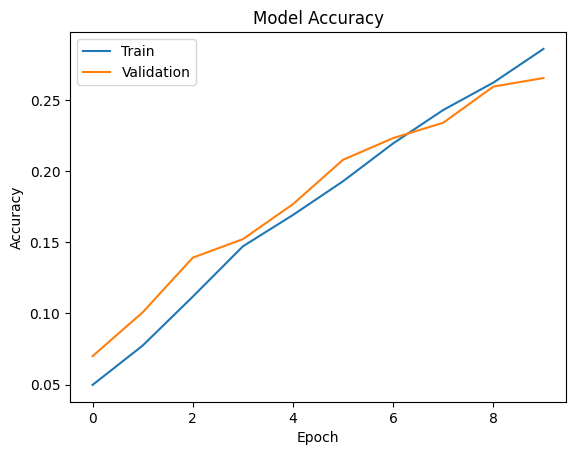

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

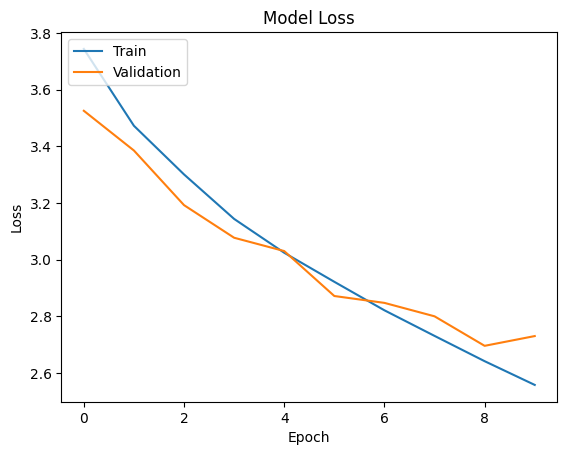

In [ ]:

plt.figure()
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

Basic modeling : skip connections

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 32, 32, 32)           896       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)           0         ['conv2d_3[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 16, 16, 64)           18496     ['max_pooling2d_2[0][0]'] 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


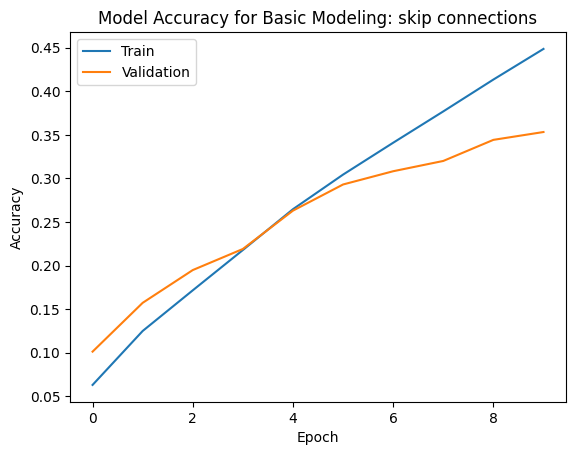

In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Add, ReLU
from tensorflow.keras import layers
# Input layer
input_tensor = Input(shape=(32, 32, 3))

# First Conv Block
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_tensor)
x = MaxPooling2D((2, 2))(x)

# Second Conv Block with Skip Connection
skip_x = x
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), padding='same')(x)
# Adjust the skip connection to match dimensions:
skip_x_processed = Conv2D(64, (1, 1), strides=(2, 2), padding='same')(skip_x)

# Add skip connection (simple addition)
x = Add()([x, skip_x_processed])
x = ReLU()(x)


# Flatten for the dense layers
x = Flatten()(x)

# Dense layers
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(32, activation='relu')(x)

# Output layer
output_tensor = Dense(OUTPUT_UNITS, activation='softmax')(x)

# Create the model
model = Model(input_tensor, output_tensor)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
h = model.fit(x_train, y_train, epochs=10, validation_split=0.2)
y_pred_prob=model.predict(x_test)
#calculate the F1 score
y_pred=np.argmax(y_pred_prob,axis=1)
y_true=np.argmax(y_test,axis=1)
f1=f1_score(y_true,y_pred,average='weighted')
print(f"F1 score:{f1}")
# Calculate Precision and Recall
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')
print(f'Loss:{test_loss}')

import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model Accuracy for Basic Modeling: skip connections')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

from tensorflow.keras.models import load_model
# Save the model
model.save("/content/drive/MyDrive/Deep_Learning_Assignment/saved_models/B1_model_skip_connection.h5")

Autoencoder modeling

In [ ]:
from sklearn.model_selection import train_test_split
x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Dense, Reshape
from keras.optimizers import Adam

input_shape = x_train.shape[1:]

input_img = Input(shape=input_shape)

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(input_shape[2], (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

# Training the model
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=4,
                shuffle=True,
                validation_data=(x_val, x_val))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 8)           1160

In [ ]:
test_loss= autoencoder.evaluate(x_test, x_test)
print(f'Loss:{test_loss}')


157/157 [==============================] - 1s 5ms/step - loss: 0.5552
Loss:0.5552194118499756


In [ ]:
from tensorflow.keras.models import load_model
# Save the model
autoencoder.save("/content/drive/MyDrive/Deep_Learning_Assignment/saved_models/Autoencoder_model.h5")

# Load the model
loaded_autoencoder_model = load_model("/content/drive/MyDrive/Deep_Learning_Assignment/saved_models/Autoencoder_model.h5")

print("Model saved")
loaded_test_loss= loaded_autoencoder_model.evaluate(x_test, x_test)
print(f'Loss:{test_loss}')

Model saved
157/157 [==============================] - 1s 3ms/step - loss: 0.5552
Loss:0.5552194118499756


In [ ]:
from sklearn.metrics import mean_squared_error

# Generate reconstructed images
reconstructed_images = loaded_autoencoder_model.predict(x_test)

# Flatten the arrays to compute MSE over all pixels
original_images_flat = x_test.reshape((x_test.shape[0], -1))
reconstructed_images_flat = reconstructed_images.reshape((reconstructed_images.shape[0], -1))

# Calculate the mean squared error
mse = mean_squared_error(original_images_flat, reconstructed_images_flat)

print(f'Mean Squared Error (MSE): {mse}')

157/157 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.010537547742690029


Block 2 Images

In [ ]:
!unzip '/content/drive/MyDrive/Deep_Learning_Assignment/dataset/PartBblock_2.npz' -d '/content/drive/MyDrive/Deep_Learning_Assignment/dataset/PartB/Block2'

In [ ]:
import numpy as np
x_train_B2 = np.load('/content/drive/MyDrive/Deep_Learning_Assignment/dataset/PartB/Block2/x_train.npy')
x_test_B2 = np.load('/content/drive/MyDrive/Deep_Learning_Assignment/dataset/PartB/Block2/x_test.npy')


y_train_B2 = np.load('/content/drive/MyDrive/Deep_Learning_Assignment/dataset/PartB/Block2/y_train.npy')
y_test_B2 = np.load('/content/drive/MyDrive/Deep_Learning_Assignment/dataset/PartB/Block2/y_test.npy')

In [ ]:
# Normalize pixel values to [0, 1]
x_train_B2, x_test_B2 = x_train_B2 / 255.0, x_test_B2 / 255.0
y_train_B2 = tf.keras.utils.to_categorical(y_train_B2, 100)
y_test_B2 = tf.keras.utils.to_categorical(y_test_B2, 100)

Transfer Learning Block 2

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras import models, layers

# Step 1: Load the saved model
model_path = "/content/drive/MyDrive/Deep_Learning_Assignment/saved_models/B1_model.h5"
model = load_model(model_path)

# Step 2 & 3: Freeze the layers of the pre-trained model
for layer in model.layers[:-5]:
    layer.trainable = False

# Step 4: Modify the model for a new task

model = models.Sequential(model.layers[:-1])  # Remove the last layer

# Add new layers for the new task
model.add(layers.Dense(64, activation='relu',name="new_dense_1"))
NEW_OUTPUT_UNITS = 100
model.add(layers.Dense(NEW_OUTPUT_UNITS, activation='softmax',name="new_output"))

# Step 5: Recompile and train the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
# Fit the model on the new data
h = model.fit(x_train_B2, y_train_B2, epochs=10, validation_split=0.2)



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

157/157 [==============================] - 1s 4ms/step
F1 score:0.283480568659501
Precision: 0.2961741896664633
Recall: 0.3082
157/157 [==============================] - 1s 6ms/step - loss: 2.5659 - accuracy: 0.3082
Test accuracy: 0.30820000171661377
Loss:2.5659193992614746


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved


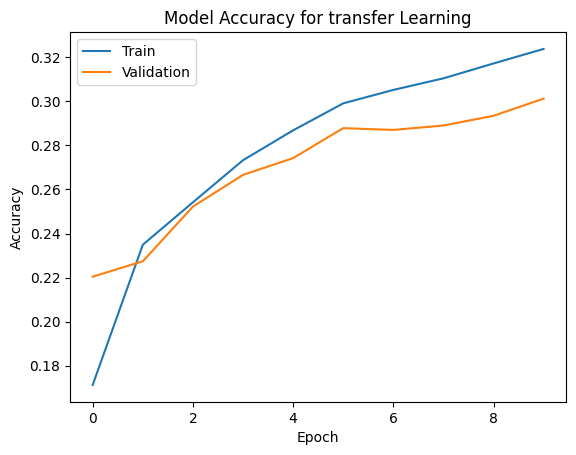

In [ ]:
y_pred_prob=model.predict(x_test_B2)
y_pred=np.argmax(y_pred_prob,axis=1)
y_true=np.argmax(y_test_B2,axis=1)
f1=f1_score(y_true,y_pred,average='weighted')
print(f"F1 score:{f1}")
# Calculate Precision and Recall
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Evaluate the model on the new data
test_loss, test_accuracy = model.evaluate(x_test_B2, y_test_B2)
print(f'Test accuracy: {test_accuracy}')
print(f'Loss:{test_loss}')
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model Accuracy for transfer Learning')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Save the newly trained model if necessary
model.save("/content/drive/MyDrive/Deep_Learning_Assignment/saved_models/B2_model.h5")
print("Model saved")